In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Random Forest Regression

In [2]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,False,False,True,False,False
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False


In [3]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])

In [4]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7793213671010573

TPR Train :	 0.4371468926553672
TNR Train :	 0.9620897774424746

FPR Train :	 0.037910222557525464
FNR Train :	 0.5628531073446328

Precision:	 0.8603196664350243
Recall:   	 0.4371468926553672
F1-score :	 0.5797237180988059


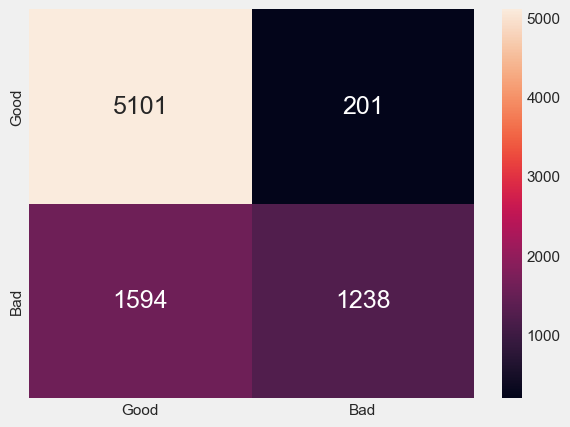

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.659495123350545

TPR Test :	 0.24394184168012925
TNR Test :	 0.8883451957295374

FPR Test :	 0.11165480427046263
FNR Test :	 0.7560581583198708

Precision:	 0.546112115732369
Recall:   	 0.24394184168012925
F1-score :	 0.3372417643774428


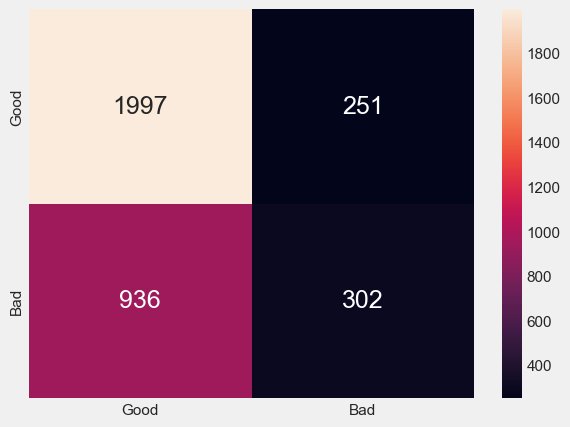

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['original'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]


# Random Forest Regression - Oversampling

In [7]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


In [8]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7576999894880689

TPR Train :	 0.6325947105075054
TNR Train :	 0.8564710308502633

FPR Train :	 0.14352896914973665
FNR Train :	 0.3674052894924946

Precision:	 0.7767700409596255
Recall:   	 0.6325947105075054
F1-score :	 0.6973079448456994


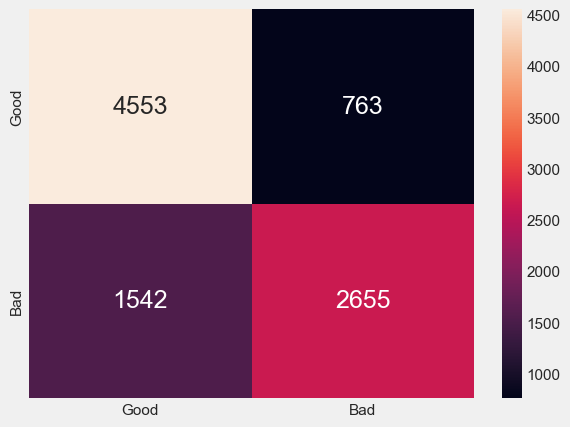

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.6377238165317636

TPR Test :	 0.48073792729245796
TNR Test :	 0.7672336615935542

FPR Test :	 0.23276633840644584
FNR Test :	 0.5192620727075421

Precision:	 0.6301564722617354
Recall:   	 0.48073792729245796
F1-score :	 0.5453985841797476


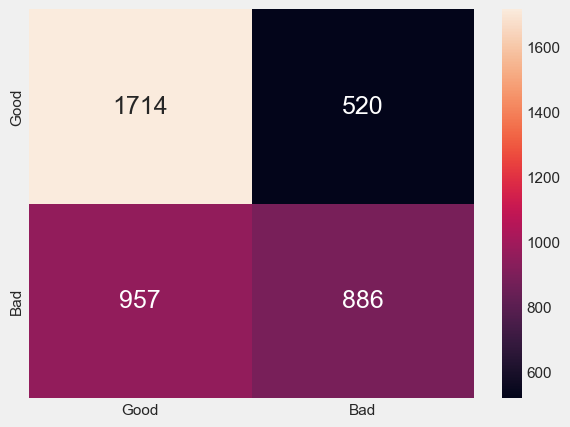

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['oversampled'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]


# Random Forest Regression - Balanced Resampling

In [11]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [12]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.757426679280984

TPR Train :	 0.7610502455610124
TNR Train :	 0.7537907505686126

FPR Train :	 0.24620924943138742
FNR Train :	 0.23894975443898753

Precision:	 0.7561936936936937
Recall:   	 0.7610502455610124
F1-score :	 0.758614196949727


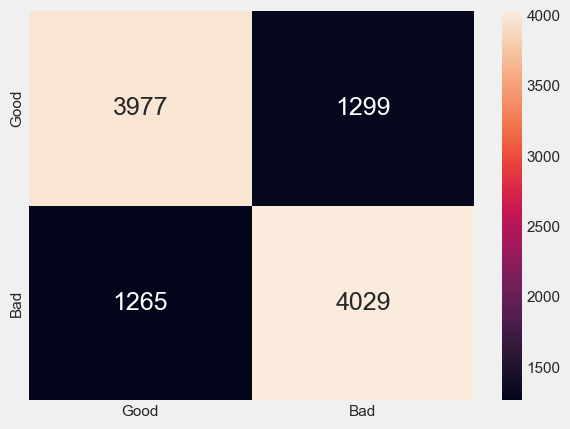

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6560706401766004

TPR Test :	 0.6706560283687943
TNR Test :	 0.6416007036059806

FPR Test :	 0.35839929639401935
FNR Test :	 0.32934397163120566

Precision:	 0.6499140893470791
Recall:   	 0.6706560283687943
F1-score :	 0.6601221640488656


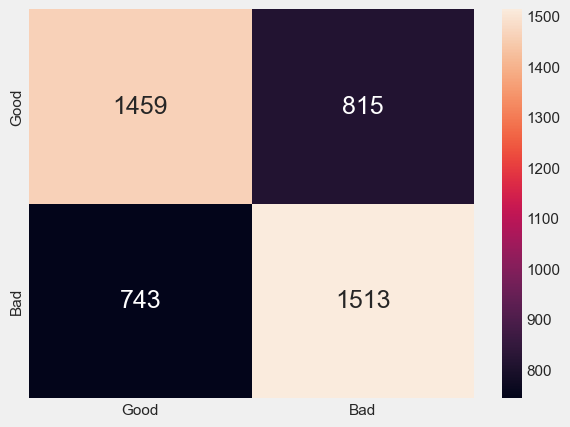

In [14]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['balanced_sampled'] = [recall[0], precision[0], rforest.score(X_test, y_test), fscore[0]]

## Cross Validation - tuning hyperparameters of Random Forest

In [15]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(500,1501,100),   # number of trees 500, 600, ..., 1500
              'max_depth': np.arange(5, 20)}             # depth of trees 5,6,7...19

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'recall')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17]),
                         'n_estimators': array([ 800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800,
       1900, 2000])},
             scoring='recall')

In [17]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

RandomForestClassifier(max_depth=15, n_estimators=800)


In [29]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 800,  #found using cvgridsearch
                                 max_depth = 15)       #found using cvgridsearch

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=800)

Train Data
Accuracy  :	 0.7568590350047304

TPR Train :	 0.762718227895626
TNR Train :	 0.7509059698645814

FPR Train :	 0.24909403013541864
FNR Train :	 0.23728177210437396

Precision:	 0.7567517228534177
Recall:   	 0.762718227895626
F1-score :	 0.7597232610321615


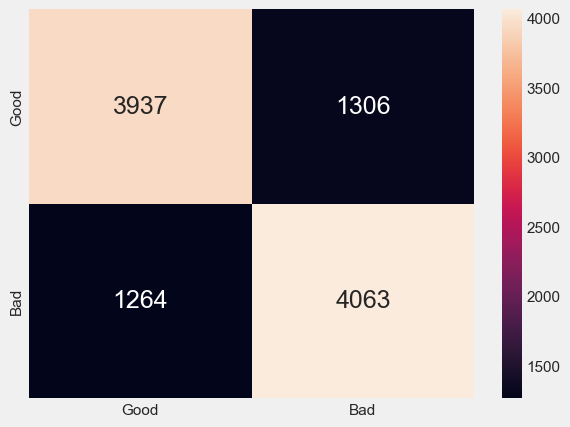

In [30]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6660044150110376

TPR Test :	 0.7070887204636648
TNR Test :	 0.6257105378224749

FPR Test :	 0.3742894621775251
FNR Test :	 0.2929112795363353

Precision:	 0.6494676494676495
Recall:   	 0.7070887204636648
F1-score :	 0.6770544290288153


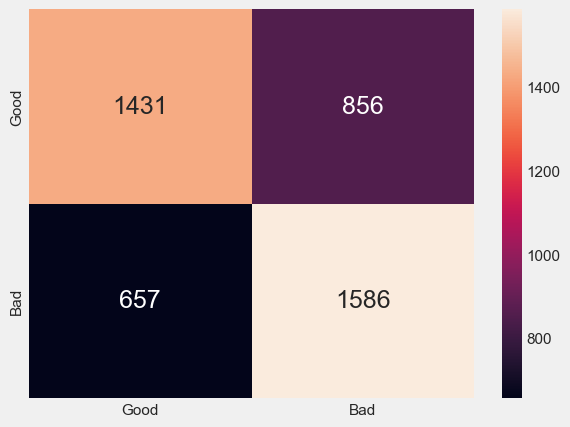

In [20]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])



In [31]:
table_cv = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['balanced_sampled'])
table_cv['balanced_sampled'] = [ recall[0], precision[0], rforest.score(X_test, y_test), fscore[0] ]




### Overview Visualization of Results

In [32]:
table

,original,oversampled,balanced_sampled
recall,0.243942,0.480738,0.670656
precision,0.546112,0.630156,0.649914
accuracy,0.659495,0.637724,0.656071
fscore,0.337242,0.545399,0.660122


In [33]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.9])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

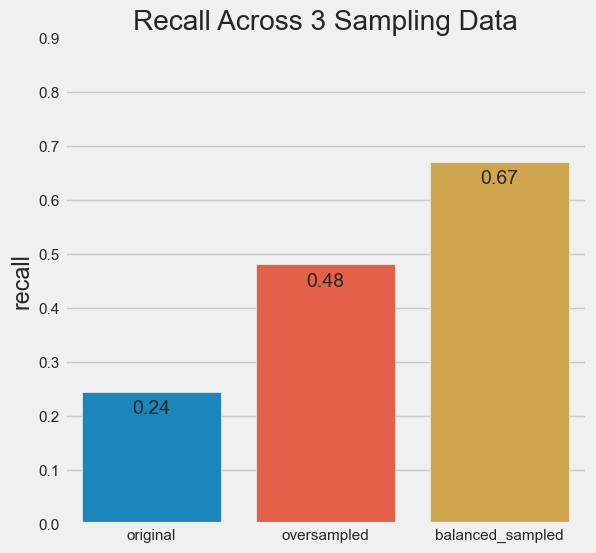

In [34]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

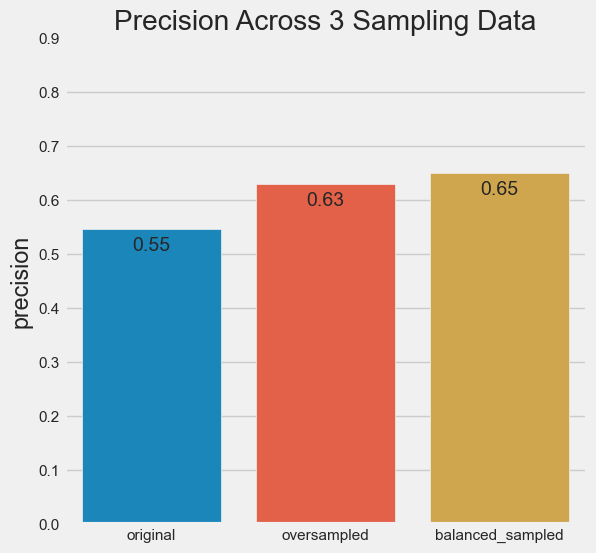

In [35]:
draw_figure(table,1,"Precision Across 3 Sampling Data")

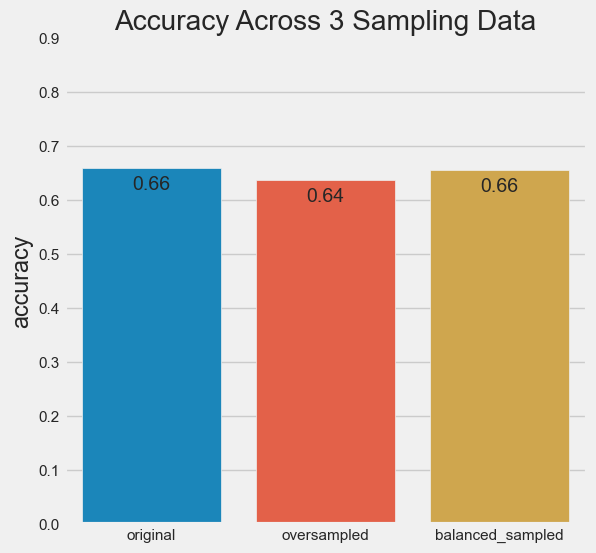

In [36]:
draw_figure(table,2,"Accuracy Across 3 Sampling Data")

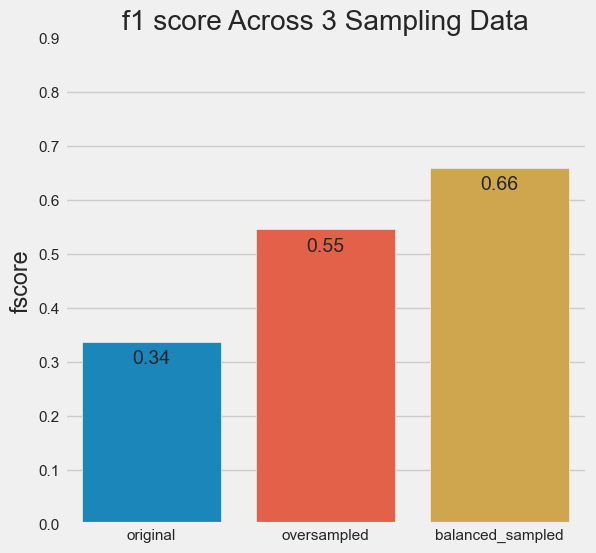

In [27]:
draw_figure(table,3,"f1 score Across 3 Sampling Data")

In [37]:
table_cv

,balanced_sampled
recall,0.762718
precision,0.756752
accuracy,0.659823
fscore,0.759723


In [38]:

transposed_tablecv = table_cv.transpose()

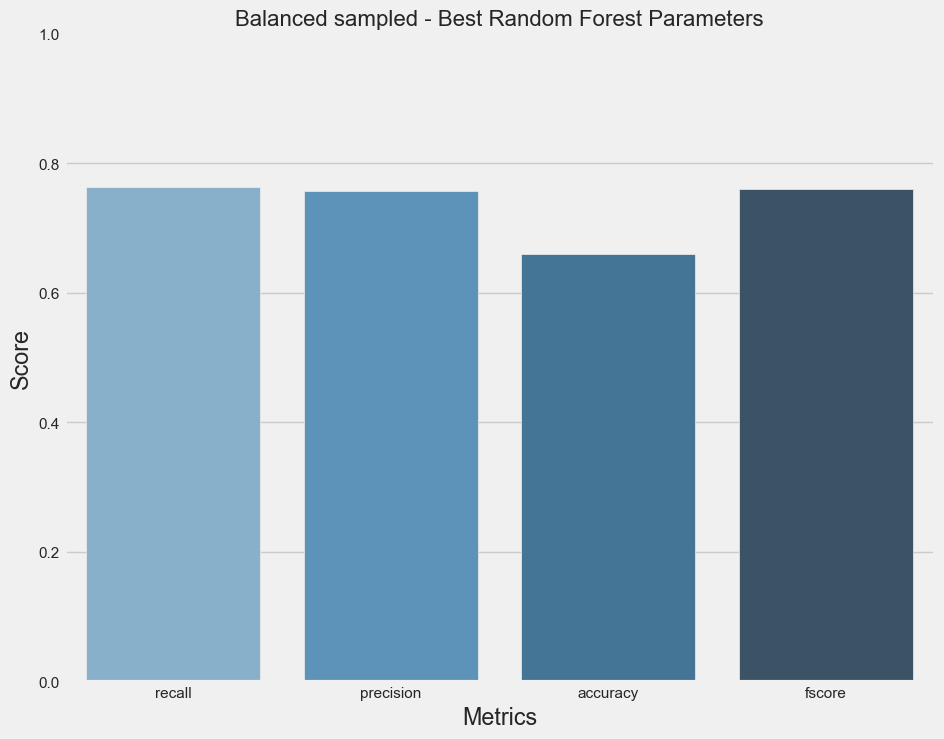

In [39]:

f = plt.figure(figsize=(10, 8))
plt.title("Balanced sampled - Best Random Forest Parameters",  fontdict={'fontsize':16})
plt.xlabel("Metrics")
plt.ylabel("Score")
sb.barplot( data=transposed_tablecv, palette="Blues_d")
plt.ylim(0, 1)
plt.show()